In [31]:
from neuralprophet import NeuralProphet

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [49]:
df=pd.read_csv('weather_Bhubhneshwar_formatted.csv')

In [50]:
df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,01-01-1990,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-1990,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-1990,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-1990,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-1990,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [52]:
print(df.columns)

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')


In [53]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

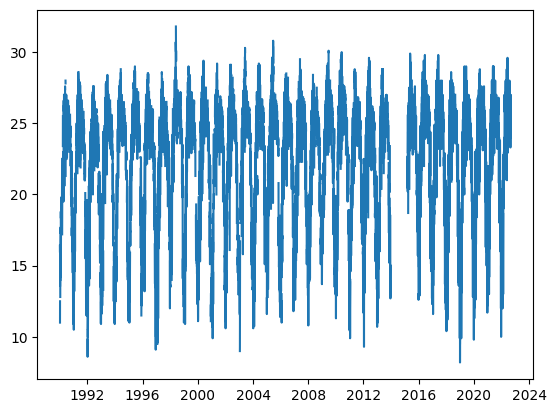

In [54]:
plt.plot(df['time'],df['tmin'])

In [55]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
snow           float64
wdir           float64
wspd           float64
wpgt           float64
pres           float64
tsun           float64
dtype: object

In [56]:
data=df[['time','tmin']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_9604\1344980971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
1,1990-01-02,16.4
2,1990-01-03,16.0
4,1990-01-05,11.0
5,1990-01-06,12.5
7,1990-01-08,13.6


In [45]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [46]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.841% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,29.483658,32.981880,0.819448,0.0,0
1,24.222746,27.379015,0.612050,0.0,1
2,19.136541,21.842941,0.418489,0.0,2
3,14.459485,16.598318,0.252551,0.0,3
4,10.489455,12.052732,0.132445,0.0,4
...,...,...,...,...,...
995,1.419088,1.832573,0.003491,0.0,995
996,1.419252,1.832721,0.003491,0.0,996
997,1.418972,1.832971,0.003490,0.0,997
998,1.418967,1.831795,0.003490,0.0,998


In [57]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.841% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 308it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-09-05,None,25.403278,22.529533,2.867167,0.006576
1,2022-09-06,None,25.405125,22.529594,2.867020,0.008513
2,2022-09-07,None,25.427509,22.529654,2.867059,0.030798
3,2022-09-08,None,25.396557,22.529713,2.867112,-0.000269
4,2022-09-09,None,25.401081,22.529774,2.866992,0.004315


In [58]:
plot1=model.plot(forecast)

In [59]:
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'e59ebf46-3d2e-437e-9b7e-395f25731ff3',
              'x': array([datetime.datetime(2022, 9, 5, 0, 0),
                          datetime.datetime(2022, 9, 6, 0, 0),
                          datetime.datetime(2022, 9, 7, 0, 0), ...,
                          datetime.datetime(2025, 2, 18, 0, 0),
                          datetime.datetime(2025, 2, 19, 0, 0),
                          datetime.datetime(2025, 2, 20, 0, 0)], dtype=object),
              'y': array([25.403278, 25.405125, 25.42751 , ..., 19.151817, 19.321781, 19.439459],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '5

In [60]:
with open('Bhubneshwar_min_model.pkl','wb') as f:
    pickle.dump(model,f)
    